In [1]:
figdir = '../../figure/hopping'

os.makedirs(figdir, exist_ok=True)

In [2]:
from scipy.misc import factorial
from scipy.special import eval_hermite
from scipy.constants import hbar, proton_mass

λ = 1064e-9
k = 2*np.pi / λ
a = λ / 2
V_0 = -50

x = -a + 2*a*np.linspace(0, 1, 1000)
y = x / 2.2

V_lat = V_0 * np.cos(k*x)**2
V_har = V_0 * (1-(k*y)**2 / 2)

E = np.sqrt(2*np.abs(V_0))

def wavefunction_harmonic(n, x):
    scale = (2 / np.abs(V_0))**(1/4) / k
    
    x = x.copy()
    x /= scale
    
    return np.exp(-x**2 / 2) * eval_hermite(n, x) / np.sqrt(2**n * factorial(n) * np.sqrt(np.pi))

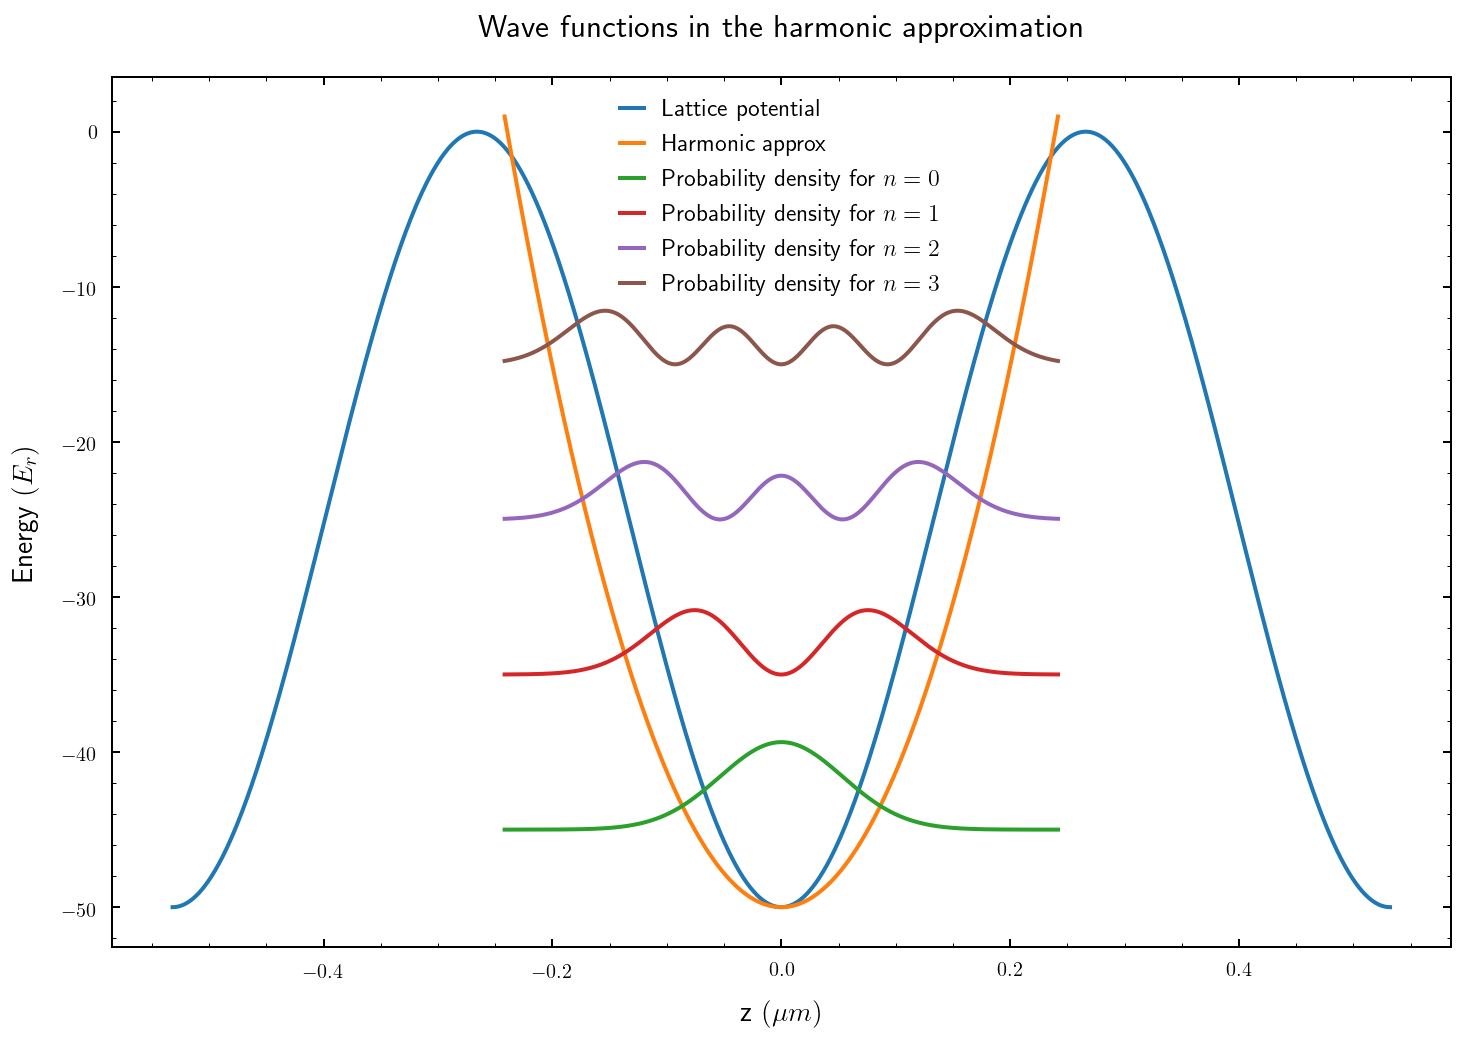

In [3]:
plt.figure(figsize=(12, 8))

plt.plot(x / 1e-6, V_lat, label='Lattice potential')
plt.plot(y / 1e-6, V_har, label='Harmonic approx')

for n in range(4):
    plt.plot(y / 1e-6, V_0 + E*(n+.5+wavefunction_harmonic(n, y)**2), label=f'Probability density for $n = {n}$')

plt.title('Wave functions in the harmonic approximation')
plt.xlabel('z $(\mu m)$')
plt.ylabel('Energy $(E_r)$')
plt.legend()
plt.savefig(os.path.join(figdir, 'harmonic.pdf'))
plt.show()

In [163]:
# lattice sizes
N = 50

# matrix dimensions
M = 60

# lattice depth
V_0 = -10
V = V_0*np.cos(k*x)

# quasi momentum (k)
qk = np.linspace(-1, 1, N//2)

# matrix elements
H = np.zeros((M+1, M+1, N//2))

for n in range(-M//2, +M//2+1):
    for m in range(-M//2, +M//2+1):
        if n == m:
            H[n, m] = (2*n+qk)**2+.5*V_0
        if np.abs(n - m) == 1:
            H[n, m] = .25*V_0

In [164]:
E = []

for n in range(H.shape[-1]):
    eigval, _ = np.linalg.eig(H[:,:,n])
    eigval.sort()
    
    E.append(eigval)
    
E = np.array(E).T

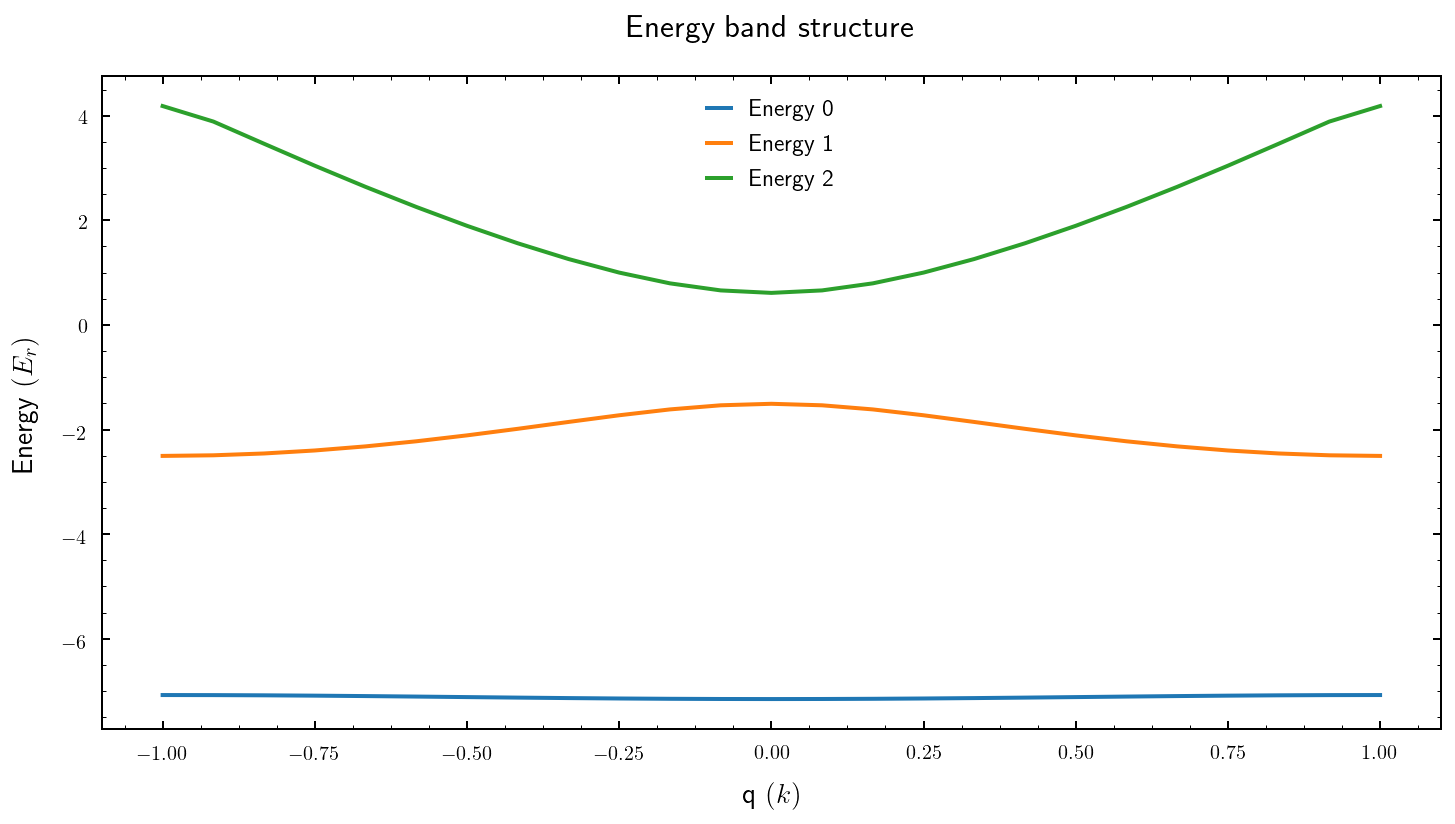

In [165]:
plt.figure(figsize=(12, 6))

for n in range(0, 3):
    plt.plot(qk, E[n], label=f'Energy {n}')
    
plt.title('Energy band structure')
plt.xlabel('q $(k)$')
plt.ylabel('Energy $(E_r)$')
plt.legend()
plt.savefig(os.path.join(figdir, 'band-structure.pdf'))
plt.show()

In [227]:
J = np.zeros((N+1, N+1, M+1))

for n in range(M+1):
    for i in range(-N//2, +N//2+1):
        for j in range(-N//2, +N//2+1):
            J[i,j,n] += np.dot(E[n], np.exp(1j*np.pi*qk*(i-j)))

J /= (N+1)

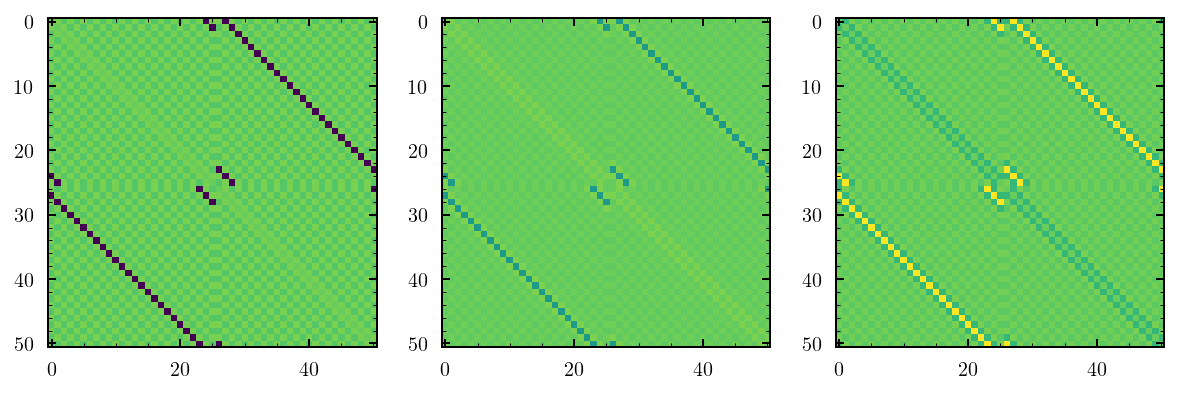

In [239]:
np.fill_diagonal(J[:,:,0], 0)
np.fill_diagonal(J[:,:,1], 0)
np.fill_diagonal(J[:,:,2], 0)


vmin = J[:,:,:3].min()
vmax = J[:,:,:3].max()

plt.figure(figsize=(10, 10))

plt.subplot(131)
plt.imshow(J[:,:,0], vmin=vmin, vmax=vmax)

plt.subplot(132)
plt.imshow(J[:,:,1], vmin=vmin, vmax=vmax)

plt.subplot(133)
im = plt.imshow(J[:,:,2], vmin=vmin, vmax=vmax)

#plt.colorbar(im)
plt.show()

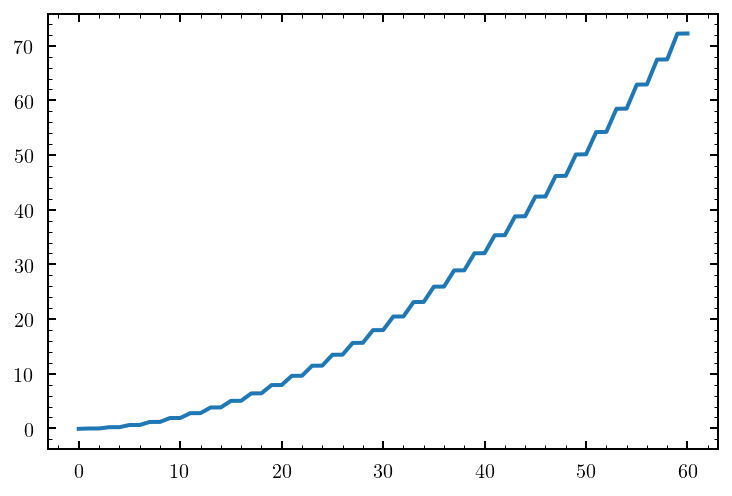

In [240]:
plt.plot(J.mean(axis=(0,1)))

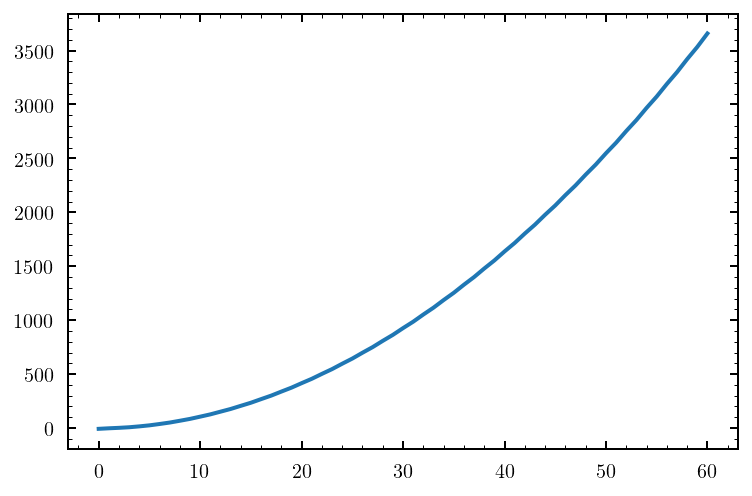

In [218]:
plt.plot(E.mean(axis=1))